In [1]:
from prophet import Prophet
import pandas as pd

c:\Users\mbern\OneDrive\Área de Trabalho\MachineLearningCourse\CourseMachineLearning\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df_wick = pd.read_csv('../Bases de dados/page_wikipedia.csv')
df_wick

,date,views
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [5]:
df_wick.describe()

,views
count,2905.000000
mean,8.138958
std,0.845957
min,5.262690
25%,7.514800
50%,7.997999
75%,8.580168
max,12.846747


array([[<Axes: title={'center': 'views'}>]], dtype=object)

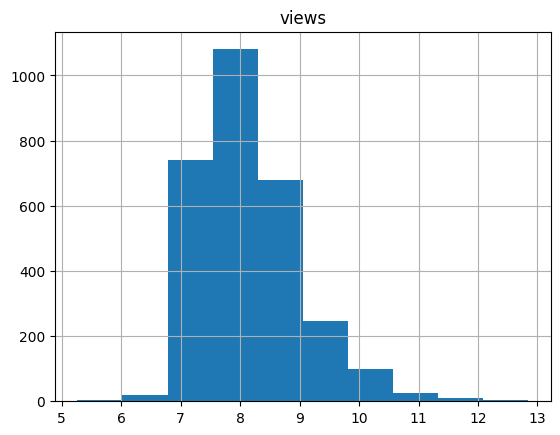

In [4]:
df_wick.hist()

In [7]:
df_wick = df_wick.rename(columns={'date':'ds','views':'y'})
df_wick = df_wick.sort_values(by='ds')
df_wick

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


In [8]:
model = Prophet()
model.fit(df_wick)

00:06:17 - cmdstanpy - INFO - Chain [1] start processing
00:06:18 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

In [12]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.039995,8.190556,9.464540,8.039995,8.039995,0.803072,0.803072,0.803072,0.352285,0.352285,0.352285,0.450787,0.450787,0.450787,0.0,0.0,0.0,8.843067
1,2007-12-11,8.038455,8.016044,9.180730,8.038455,8.038455,0.553164,0.553164,0.553164,0.119640,0.119640,0.119640,0.433524,0.433524,0.433524,0.0,0.0,0.0,8.591619
2,2007-12-12,8.036915,7.762326,9.034646,8.036915,8.036915,0.350535,0.350535,0.350535,-0.066661,-0.066661,-0.066661,0.417196,0.417196,0.417196,0.0,0.0,0.0,8.387451
3,2007-12-13,8.035375,7.703905,8.987145,8.035375,8.035375,0.329980,0.329980,0.329980,-0.072268,-0.072268,-0.072268,0.402248,0.402248,0.402248,0.0,0.0,0.0,8.365355
4,2007-12-14,8.033835,7.731716,8.977756,8.033835,8.033835,0.319506,0.319506,0.319506,-0.069578,-0.069578,-0.069578,0.389085,0.389085,0.389085,0.0,0.0,0.0,8.353342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2990,2016-04-15,7.470820,6.301454,7.514212,7.443318,7.502814,-0.560970,-0.560970,-0.560970,-0.069578,-0.069578,-0.069578,-0.491392,-0.491392,-0.491392,0.0,0.0,0.0,6.909849
2991,2016-04-16,7.469794,6.102740,7.344740,7.441195,7.502533,-0.773016,-0.773016,-0.773016,-0.311715,-0.311715,-0.311715,-0.461301,-0.461301,-0.461301,0.0,0.0,0.0,6.696778
2992,2016-04-17,7.468769,6.444119,7.706963,7.439404,7.502138,-0.383313,-0.383313,-0.383313,0.048297,0.048297,0.048297,-0.431610,-0.431610,-0.431610,0.0,0.0,0.0,7.085456
2993,2016-04-18,7.467744,6.759457,8.016428,7.437962,7.501826,-0.050772,-0.050772,-0.050772,0.352285,0.352285,0.352285,-0.403057,-0.403057,-0.403057,0.0,0.0,0.0,7.416972


In [13]:
len(forecast) - len(df_wick)

90

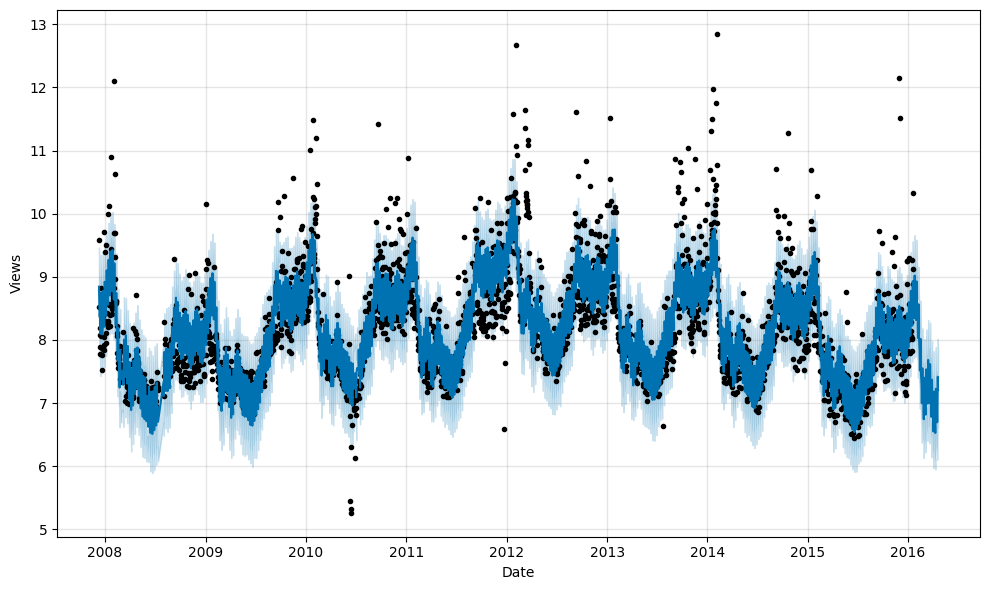

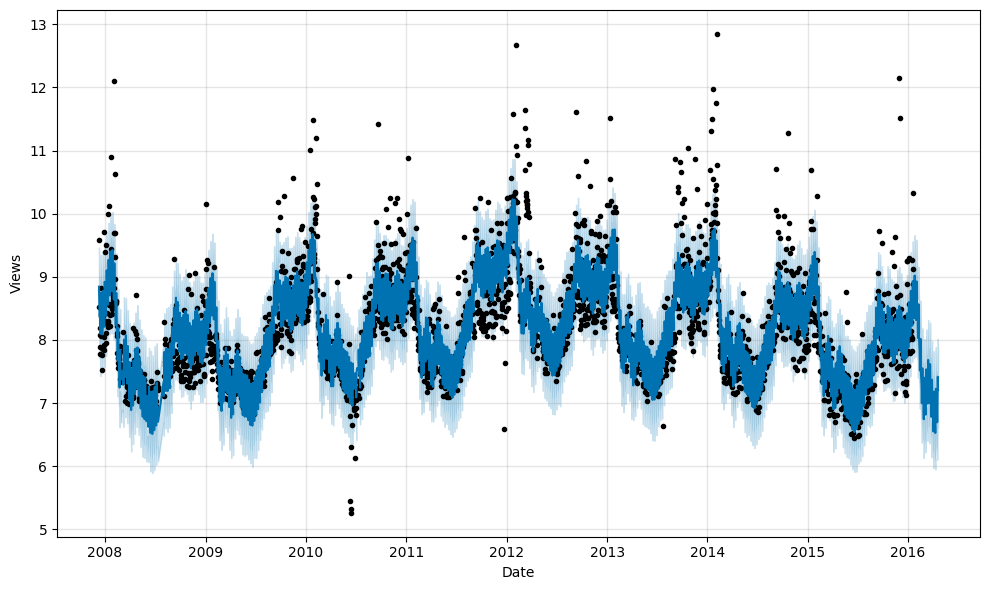

In [15]:
model.plot(forecast,xlabel='Date',ylabel='Views')

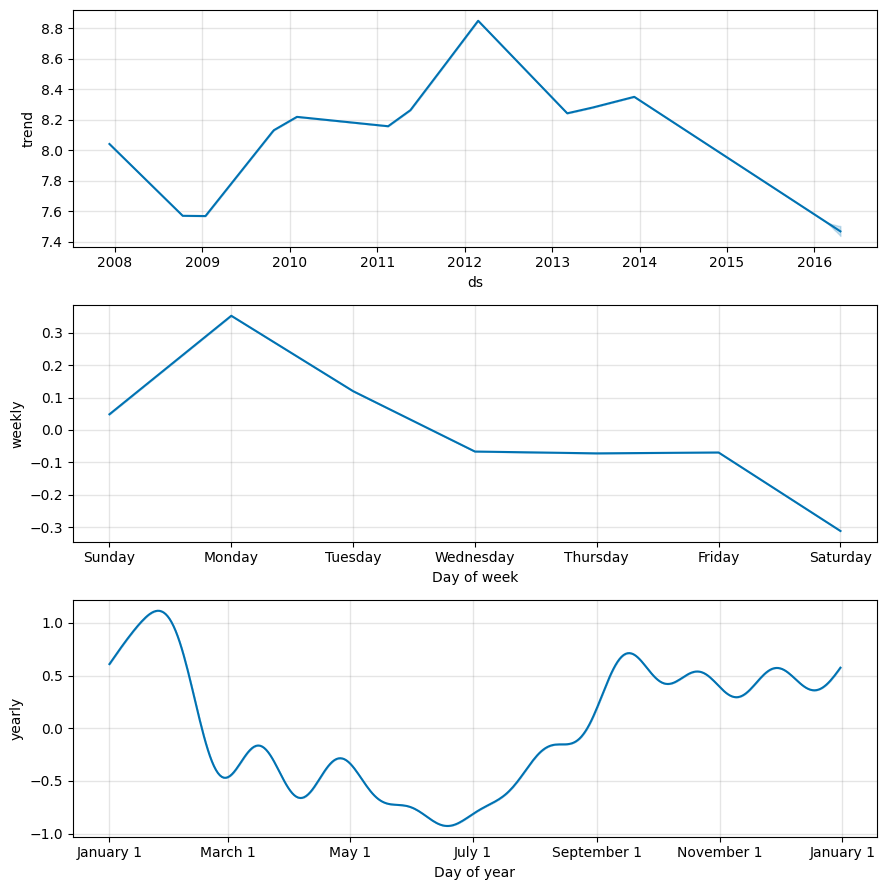

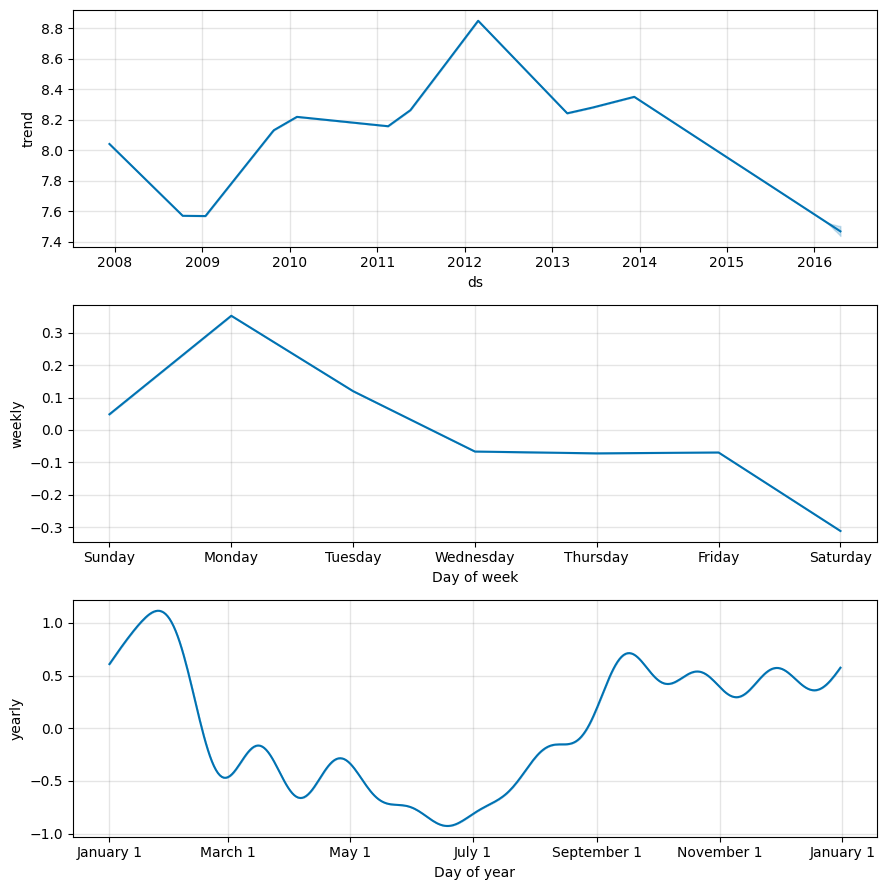

In [16]:
model.plot_components(forecast)

In [17]:
from prophet.plot import plot_plotly,plot_components_plotly

In [18]:
plot_plotly(model,forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'marker': {'color': 'black', 'size': 4},
              'mode': 'markers',
              'name': 'Actual',
              'type': 'scatter',
              'x': array([datetime.datetime(2007, 12, 10, 0, 0),
                          datetime.datetime(2007, 12, 11, 0, 0),
                          datetime.datetime(2007, 12, 12, 0, 0), ...,
                          datetime.datetime(2016, 1, 18, 0, 0),
                          datetime.datetime(2016, 1, 19, 0, 0),
                          datetime.datetime(2016, 1, 20, 0, 0)], dtype=object),
              'y': array([ 9.59076114,  8.51959032,  8.18367658, ..., 10.33377535,  9.12587122,
                           8.89137401])},
             {'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2007, 12, 10, 0, 0),
                          datetime.datetime(2007, 12, 11, 0, 0),
                          datetime.datetime(2007, 12, 12, 0, 0), ...,
                          datetime.datetime(2016, 4, 17, 0, 0),
                          datetime.datetime(2016, 4, 18, 0, 0),
                          datetime.datetime(2016, 4, 19, 0, 0)], dtype=object),
              'y': array([8.19055568, 8.01604404, 7.76232619, ..., 6.44411944, 6.75945713,
                          6.60730158])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'Predicted',
              'type': 'scatter',
              'x': array([datetime.datetime(2007, 12, 10, 0, 0),
                          datetime.datetime(2007, 12, 11, 0, 0),
                          datetime.datetime(2007, 12, 12, 0, 0), ...,
                          datetime.datetime(2016, 4, 17, 0, 0),
                          datetime.datetime(2016, 4, 18, 0, 0),
                          datetime.datetime(2016, 4, 19, 0, 0)], dtype=object),
              'y': array([8.84306733, 8.59161927, 8.38745078, ..., 7.08545645, 7.41697209,
                          7.21001581])},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'hoverinfo': 'skip',
              'line': {'width': 0},
              'mode': 'lines',
              'type': 'scatter',
              'x': array([datetime.datetime(2007, 12, 10, 0, 0),
                          datetime.datetime(2007, 12, 11, 0, 0),
                          datetime.datetime(2007, 12, 12, 0, 0), ...,
                          datetime.datetime(2016, 4, 17, 0, 0),
                          datetime.datetime(2016, 4, 18, 0, 0),
                          datetime.datetime(2016, 4, 19, 0, 0)], dtype=object),
              'y': array([9.46454037, 9.18072999, 9.03464646, ..., 7.70696265, 8.01642805,
                          7.84579916])}],
    'layout': {'height': 600,
               'showlegend': False,
               'template': '...',
               'width': 900,
               'xaxis': {'rangeselector': {'buttons': [{'count': 7, 'label': '1w', 'step': 'day', 'stepmode': 'backward'},
                                                       {'count': 1,
                                                        'label': '1m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 6,
                                                        'label': '6m',
                                                        'step': 'month',
                                                        'stepmode': 'backward'},
                                                       {'count': 1, 'label': '1y', 'step': 'year', 'stepmode': 'backward'},
                                                       {'step': 'all'}]},
                         'rangeslider'

In [19]:
plot_components_plotly(model,forecast)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'trend',
              'type': 'scatter',
              'x': array([datetime.datetime(2007, 12, 10, 0, 0),
                          datetime.datetime(2007, 12, 11, 0, 0),
                          datetime.datetime(2007, 12, 12, 0, 0), ...,
                          datetime.datetime(2016, 4, 17, 0, 0),
                          datetime.datetime(2016, 4, 18, 0, 0),
                          datetime.datetime(2016, 4, 19, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([8.03999523, 8.03845527, 8.03691531, ..., 7.46876919, 7.46774402,
                          7.46671886]),
              'yaxis': 'y'},
             {'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_upper',
              'type': 'scatter',
              'x': array([datetime.datetime(2007, 12, 10, 0, 0),
                          datetime.datetime(2007, 12, 11, 0, 0),
                          datetime.datetime(2007, 12, 12, 0, 0), ...,
                          datetime.datetime(2016, 4, 17, 0, 0),
                          datetime.datetime(2016, 4, 18, 0, 0),
                          datetime.datetime(2016, 4, 19, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([8.03999523, 8.03845527, 8.03691531, ..., 7.50213828, 7.50182598,
                          7.50192062]),
              'yaxis': 'y'},
             {'fill': 'tonexty',
              'fillcolor': 'rgba(0, 114, 178, 0.2)',
              'line': {'color': 'rgba(0, 114, 178, 0.2)', 'width': 0},
              'mode': 'lines',
              'name': 'trend_lower',
              'type': 'scatter',
              'x': array([datetime.datetime(2007, 12, 10, 0, 0),
                          datetime.datetime(2007, 12, 11, 0, 0),
                          datetime.datetime(2007, 12, 12, 0, 0), ...,
                          datetime.datetime(2016, 4, 17, 0, 0),
                          datetime.datetime(2016, 4, 18, 0, 0),
                          datetime.datetime(2016, 4, 19, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([8.03999523, 8.03845527, 8.03691531, ..., 7.43940438, 7.43796162,
                          7.43650029]),
              'yaxis': 'y'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'yearly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0, 59, 178082),
                          datetime.datetime(2017, 1, 3, 0, 1, 58, 356164), ...,
                          datetime.datetime(2017, 12, 29, 5, 57, 2, 465753),
                          datetime.datetime(2017, 12, 30, 5, 58, 1, 643835),
                          datetime.datetime(2017, 12, 31, 5, 59, 0, 821917)], dtype=object),
              'xaxis': 'x2',
              'y': array([0.60902607, 0.63649762, 0.66403623, ..., 0.52889928, 0.55500991,
                          0.58179544]),
              'yaxis': 'y2'},
             {'line': {'color': '#0072B2', 'width': 2},
              'mode': 'lines',
              'name': 'weekly',
              'type': 'scatter',
              'x': array([datetime.datetime(2017, 1, 1, 0, 0),
                          datetime.datetime(2017, 1, 2, 0, 0),
                          datetime.datetime(2017, 1, 3, 0, 0),
                          datetime.datetime(2017, 1, 4, 0, 0),
                          datetime.datetime(2017, 1, 5, 0, 0),
                          datetime.datetime(2017, 1, 6, 0, 0),
                          datetime.datetime(2017, 1, 7, 0, 0)], dtype=object),
              'xaxis': 'x3',
              'y': array([ 0.04829682,  0.35228493,  0.11963979, -0.06666083, -0.07226758,
                          -0.06957836, -0.31171476]),
              'yaxis': 'y3'}],
 